In [10]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"


        fruits = ["Apple", "Banana", "Mango", "Orange", "Strawberry", "Grapes",
          "Watermelon", "Mango", "DragonFruit", "Kiwi", "Pineapple",
          "Papaya", "Guava", "Coconut"]

regions = ["North", "South", "East", "West", "Tropical"]

data = []
start_date = datetime(2025, 1, 1)

for i in range(500):
    fruit = random.choice(fruits)
    region = random.choice(regions)
    date = start_date + timedelta(days=random.randint(0, 364))

    season = get_season(date)

    units_sold = random.randint(50, 500)
    unit_price = round(random.uniform(0.5, 3.0), 2)
    revenue = round(units_sold * unit_price, 2)

    data.append([
        fruit,
        region,
        date.strftime("%Y-%m-%d"),
        units_sold,
        unit_price,
        revenue,
        season
    ])

# Create DataFrame
df = pd.DataFrame(data, columns=["Fruit", "Region", "Date", "Units_Sold", "Unit_Price", "Revenue", "Season"])
df.head(35)



,Fruit,Region,Date,Units_Sold,Unit_Price,Revenue,Season
0,Watermelon,West,2025-05-14,283,0.60,169.80,Spring
1,Orange,West,2025-11-23,392,2.42,948.64,Fall
2,Kiwi,West,2025-12-29,423,1.12,473.76,Winter
3,Apple,North,2025-12-22,181,2.01,363.81,Winter
4,Grapes,East,2025-11-13,441,2.17,956.97,Fall
5,Mango,East,2025-01-06,331,0.94,311.14,Winter
6,Orange,Tropical,2025-08-29,474,0.65,308.10,Summer
7,Orange,East,2025-09-20,354,2.92,1033.68,Fall
8,Grapes,Tropical,2025-07-26,409,1.36,556.24,Summer
9,Papaya,Tropical,2025-10-29,214,1.85,395.90,Fall


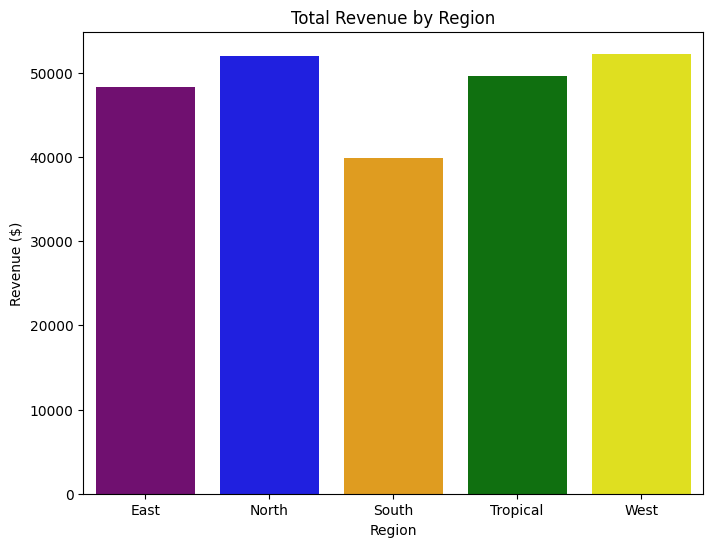

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

region_revenue = df.groupby("Region", as_index=False)["Revenue"].sum()

region_colors = {
    "North": "blue",
    "South": "orange",
    "Tropical": "green",
    "East": "purple",
    "West": "yellow"
}

plt.figure(figsize=(8,6))
sns.barplot(
    data=region_revenue,
    x="Region",
    y="Revenue",
    hue="Region",
    palette=region_colors,
    legend=False
)

plt.title("Total Revenue by Region")
plt.ylabel("Revenue ($)")
plt.xlabel("Region")
plt.show()



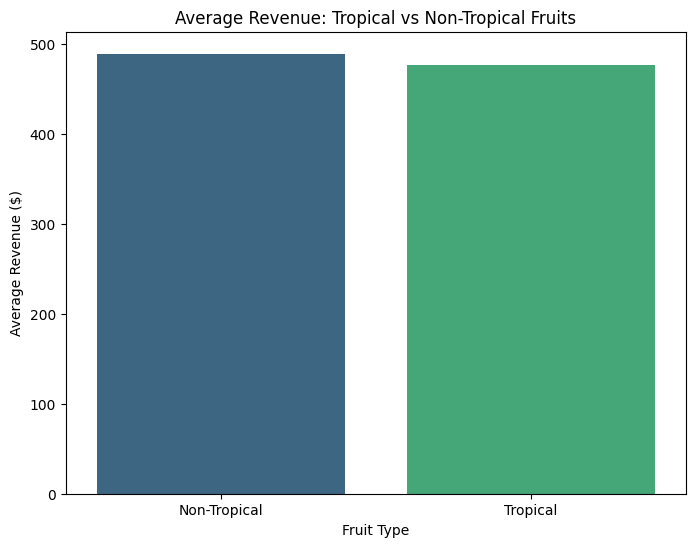

In [14]:
df["Fruit_Type"] = df["Fruit"].apply(lambda x: "Tropical" if x in ["Mango", "Pineapple", "Papaya", "Guava", "Coconut", "Dragon Fruit"] else "Non-Tropical")

plt.figure(figsize=(8,6))
sns.barplot(
    data=df.groupby("Fruit_Type", as_index=False)["Revenue"].mean(),
    x="Fruit_Type", y="Revenue", hue= "Fruit_Type", palette="viridis"
)
plt.title("Average Revenue: Tropical vs Non-Tropical Fruits")
plt.ylabel("Average Revenue ($)")
plt.xlabel("Fruit Type")
plt.show()


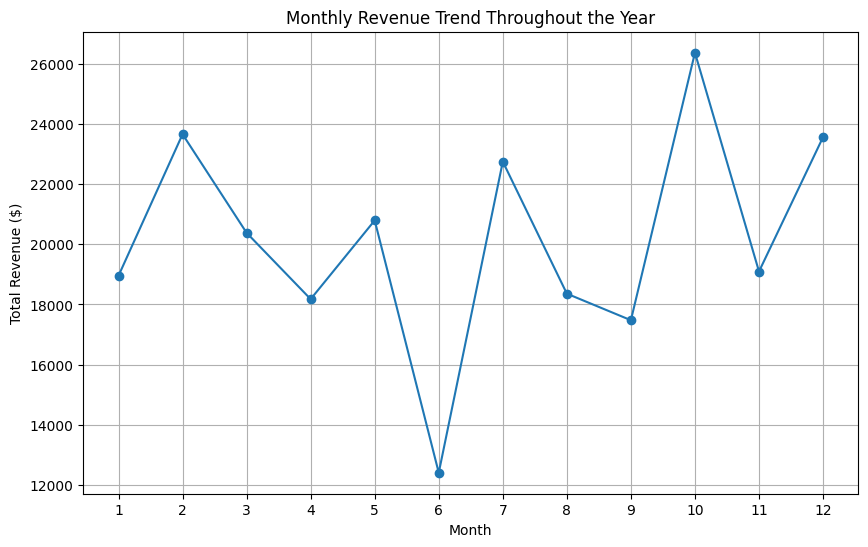

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# ensure date column is datetime
df["Date"] = pd.to_datetime(df["Date"])

# extract month
df["Month"] = df["Date"].dt.month

# group revenue by month
monthly_revenue = (
    df.groupby("Month", as_index=False)["Revenue"]
    .sum()
)

# plot revenue trend
plt.figure(figsize=(10,6))
plt.plot(monthly_revenue["Month"], monthly_revenue["Revenue"], marker="o")

plt.title("Monthly Revenue Trend Throughout the Year")
plt.xlabel("Month")
plt.ylabel("Total Revenue $")
plt.xticks(range(1, 13))
plt.grid(True)

plt.show()


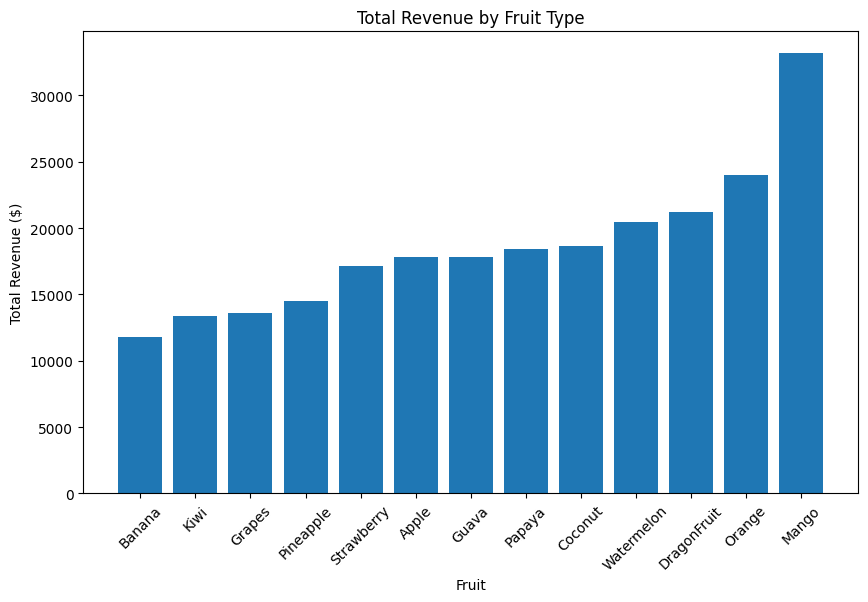

In [19]:
import matplotlib.pyplot as plt

# group by fruit
fruit_summary = (
    df.groupby("Fruit", as_index=False)
    .agg({
        "Revenue": "sum",
        "Units_Sold": "sum"
    })
)

# sort by revenue
fruit_summary = fruit_summary.sort_values("Revenue", ascending=True)

# revenue bar chart
plt.figure(figsize=(10,6))
plt.bar(fruit_summary["Fruit"], fruit_summary["Revenue"])

plt.title("Total Revenue by Fruit Type")
plt.xlabel("Fruit")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.show()


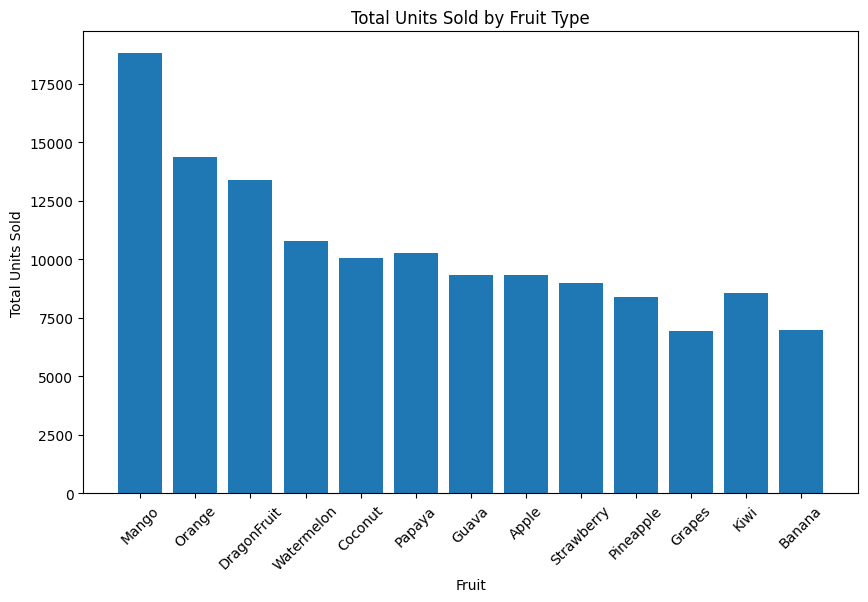

In [18]:
plt.figure(figsize=(10,6))
plt.bar(fruit_summary["Fruit"], fruit_summary["Units_Sold"])

plt.title("Total Units Sold by Fruit Type")
plt.xlabel("Fruit")
plt.ylabel("Total Units Sold")
plt.xticks(rotation=45)
plt.show()
